In [1]:
%matplotlib notebook

import DronePlotter
from py_drone_module import DronePlottable, DroneLogLoader

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95vw !important; }</style>"))

In [4]:
originallog = DroneLogLoader('/home/pieter/GitHub/EAGLE/DroneLogs/eagle-2019-03-12.18.38.51.dat')
print(originallog.getFirstFlyingIndex(), originallog.getFinalFlyingIndex(), len(originallog))

280 2033 2196


<IPython.core.display.Javascript object>


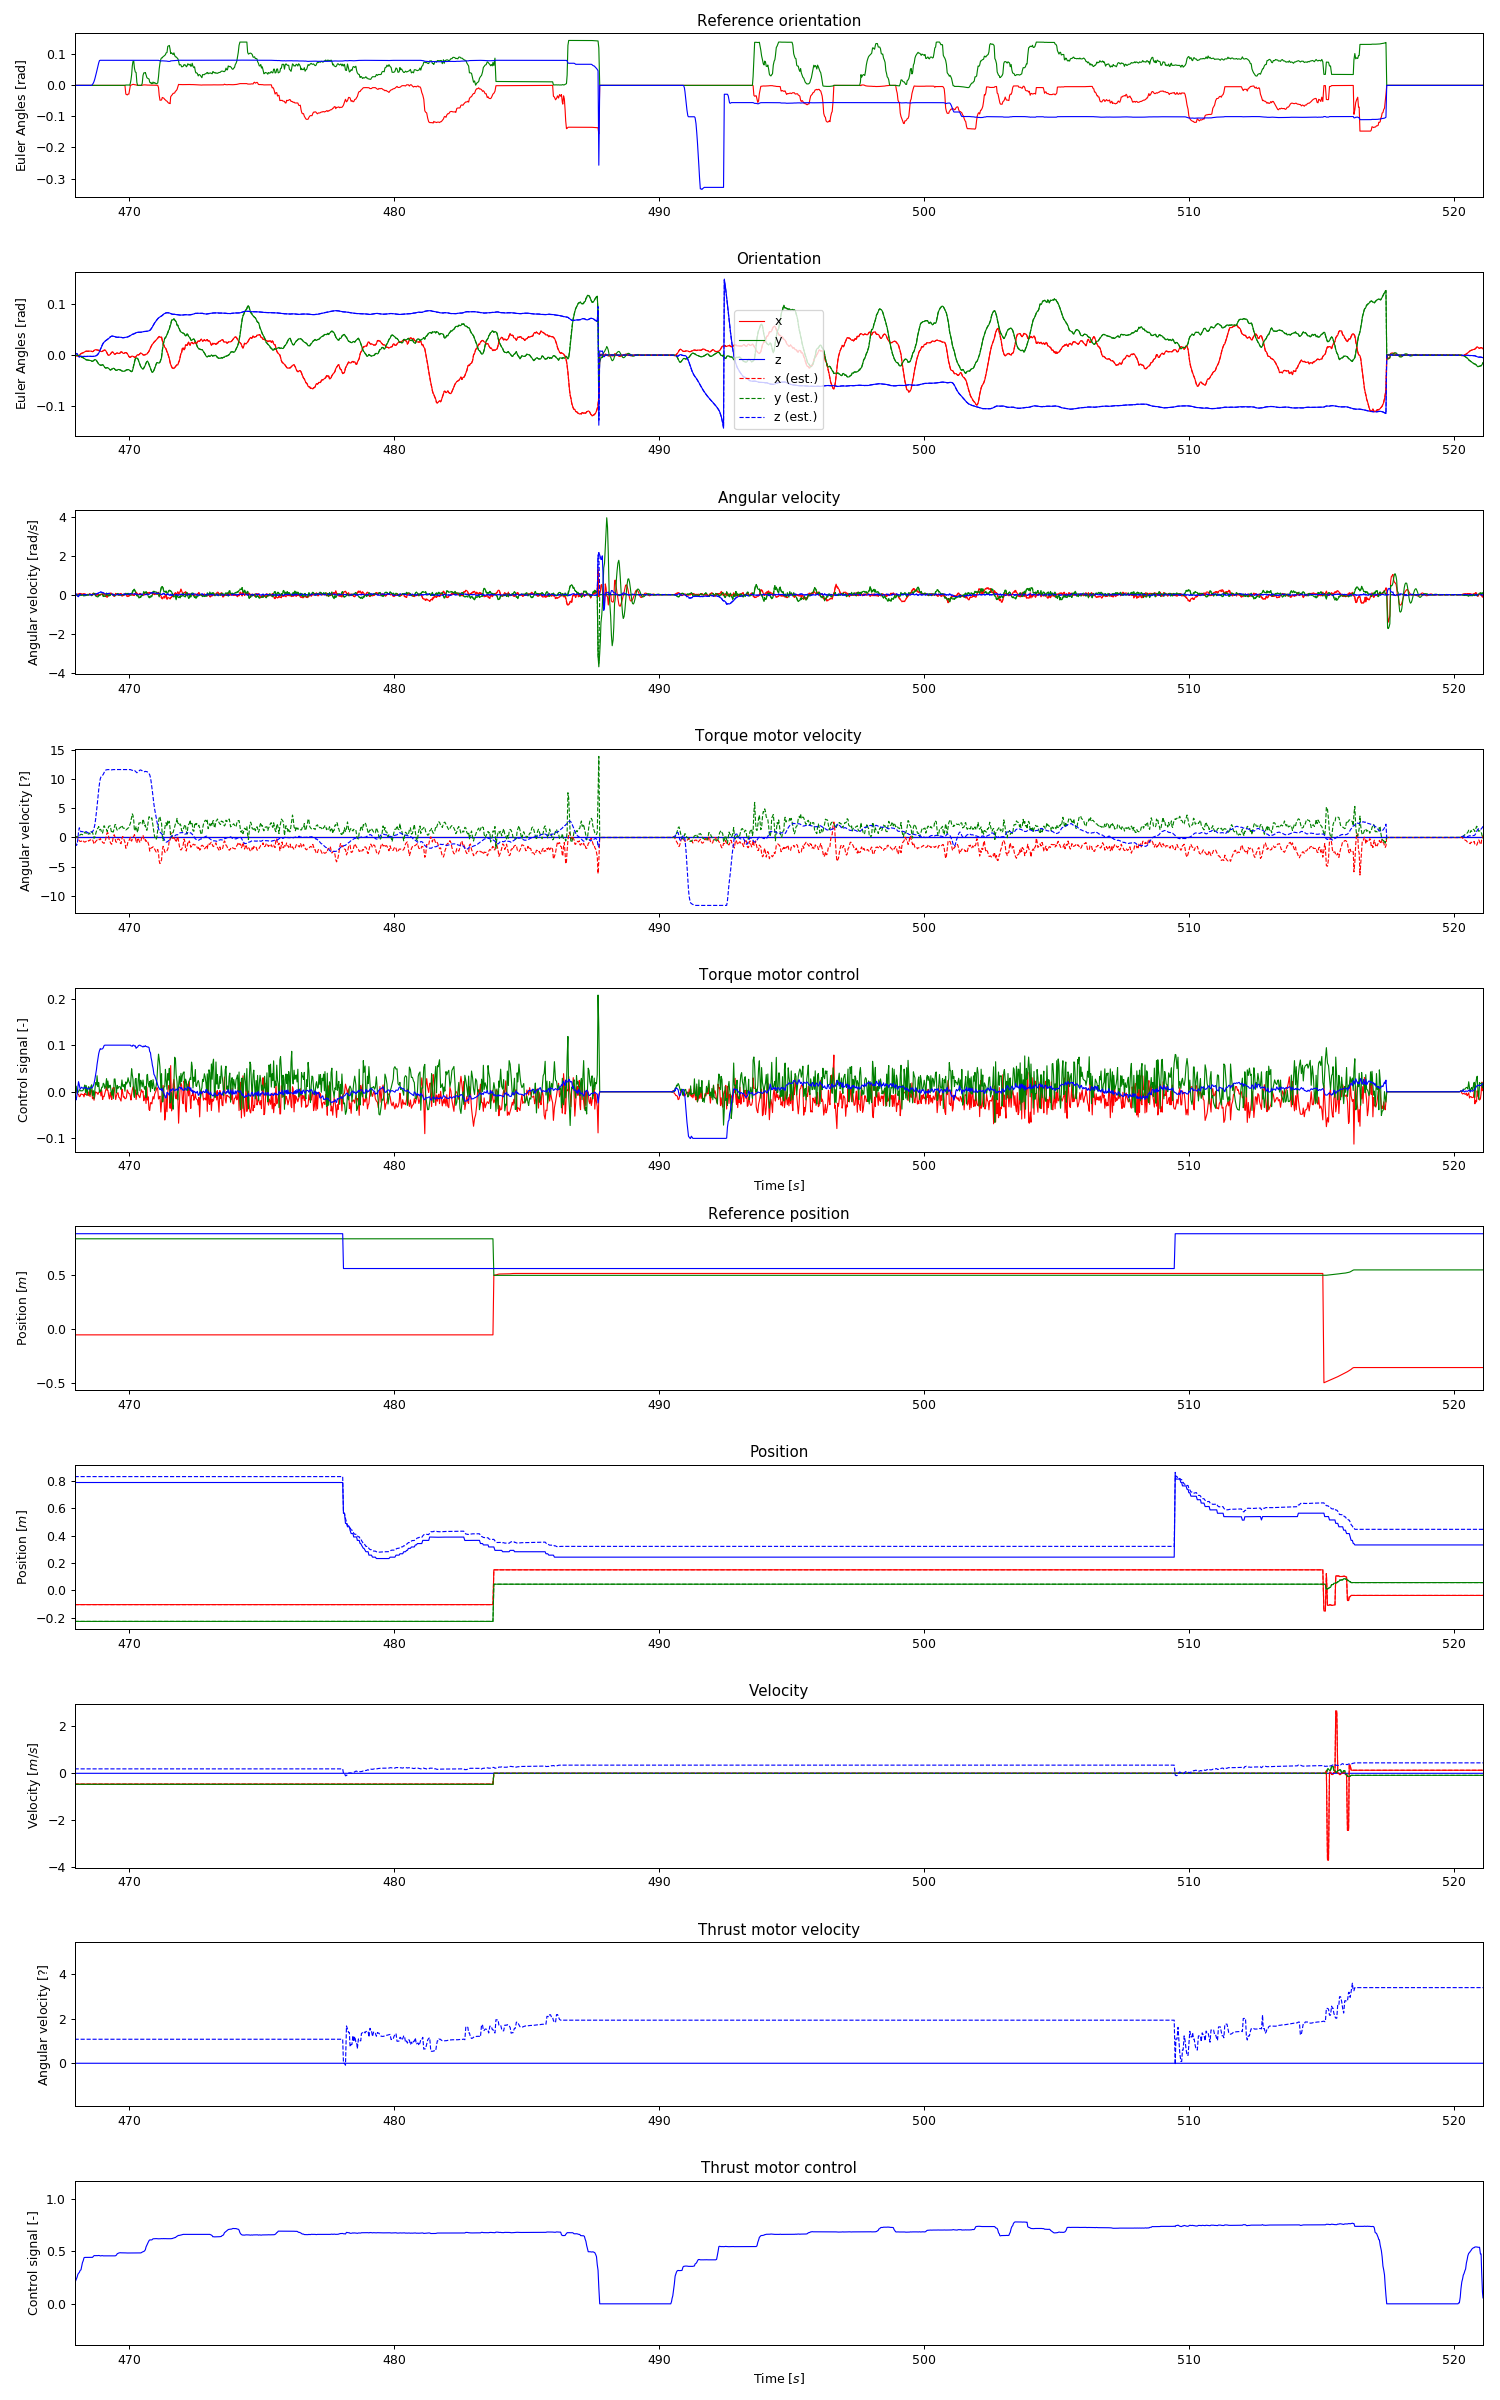

In [7]:
log = originallog.trim()
DronePlotter.plot(log, vertical=True, w=1500, h=800*3);